# Show behavior predictions for specific neural models

In [15]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_ridge

cc = np.concatenate

STRAINS = ['NM91', 'ZH23']
PTRAIN = .8
NSPLIT = 30

FIT_LIN = skl_fit_ridge

ALPHA = 10

FPS = 30.03
TARG = 'FFV_MN_60'
TARG_SHOW = 'FFV'

In [16]:
FSTRAIN = 'data/simple/strains.csv'

MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = MSTRAIN.sum()
NTRAIN = int(round(PTRAIN*NTR))

# Population M-A model

In [17]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

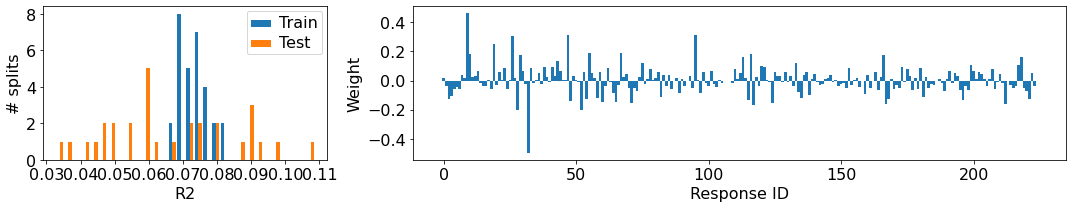

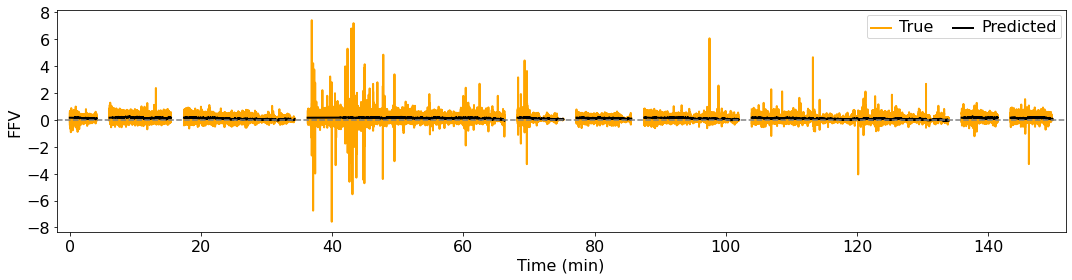

In [18]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot((t + t_offset)/60, y, c='orange', lw=2)
    ax.plot((t + t_offset)/60, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing/60, t_offset/60), x_label='Time (min)', y_label=TARG_SHOW, font_size=16)

# Linear filter

In [19]:
FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

# FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

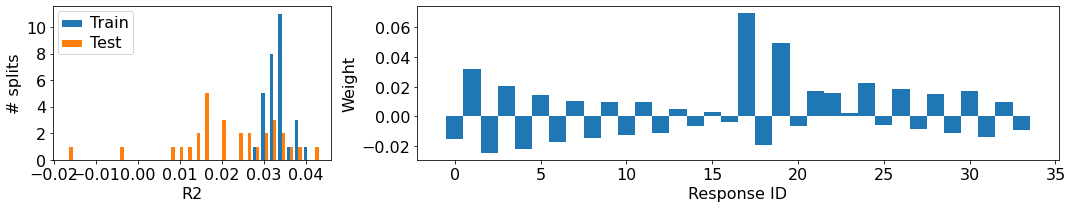

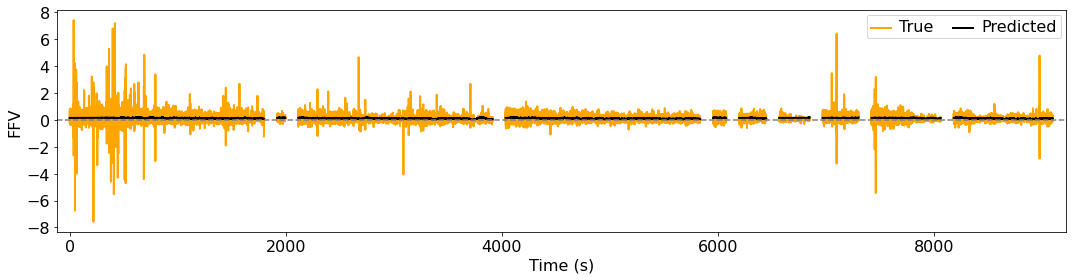

In [20]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Elapsed time

In [21]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln2e'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

# FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

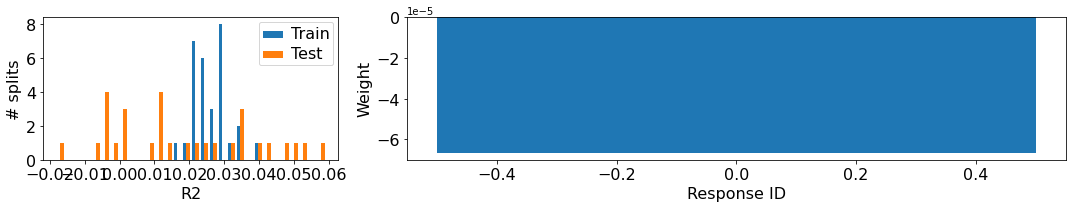

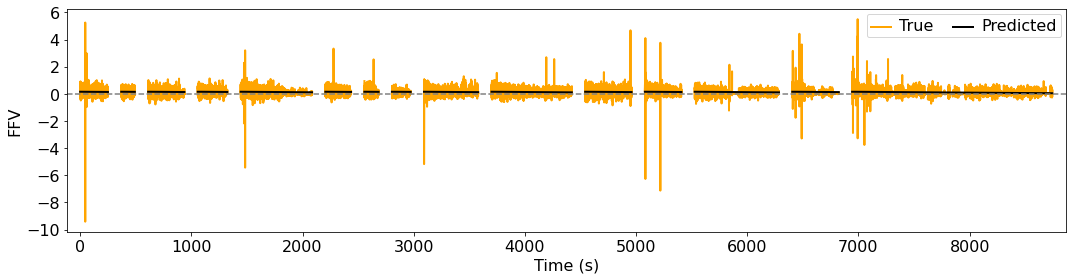

In [22]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Non-adaptive population M-A model

In [23]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
NRL_MDL = 'dyn_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

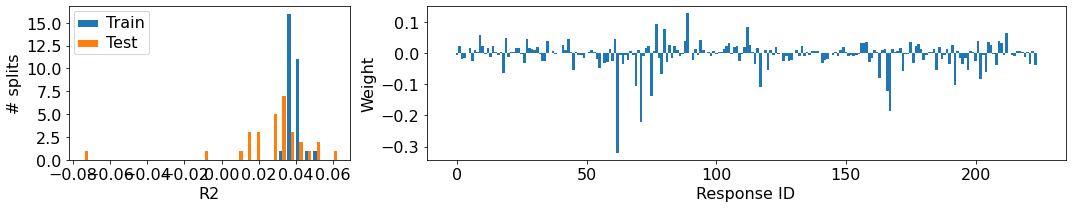

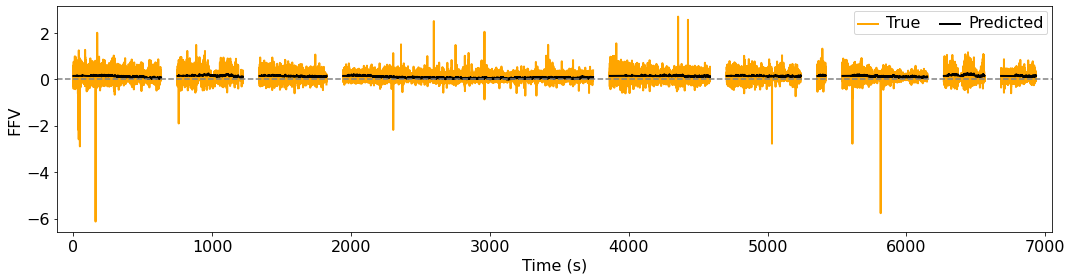

In [24]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Population L-N model (neural models fit with ridge regression)

In [25]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

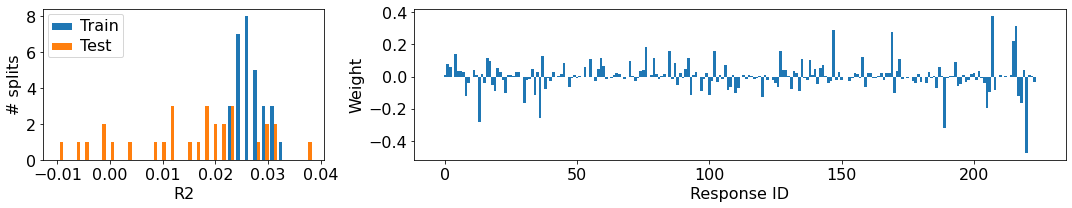

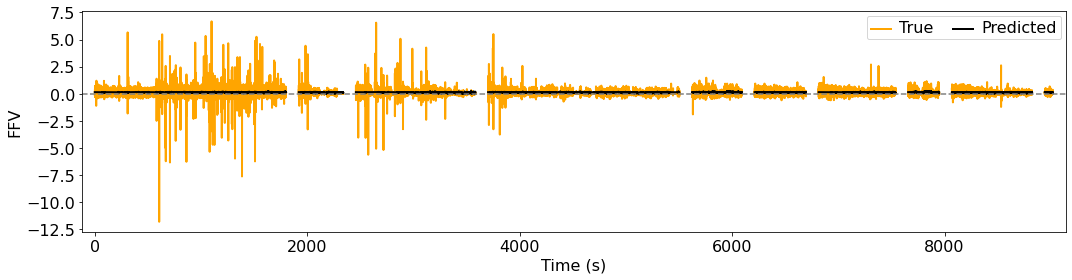

In [26]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# Fast adapting, slow decay M-A population

In [29]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
LOAD_DIR = 'dyn_alt'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'
NRL_MDL = 'dyn_max_tau_a_1_tau_r_120'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

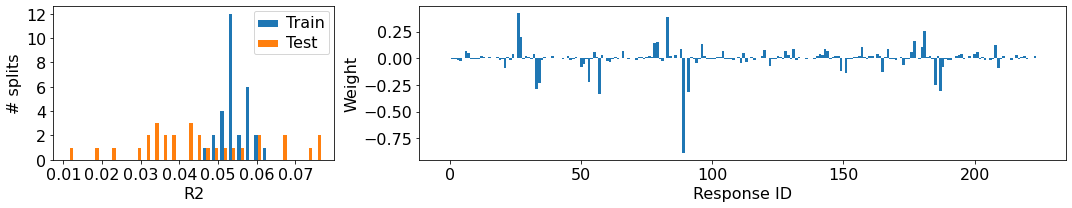

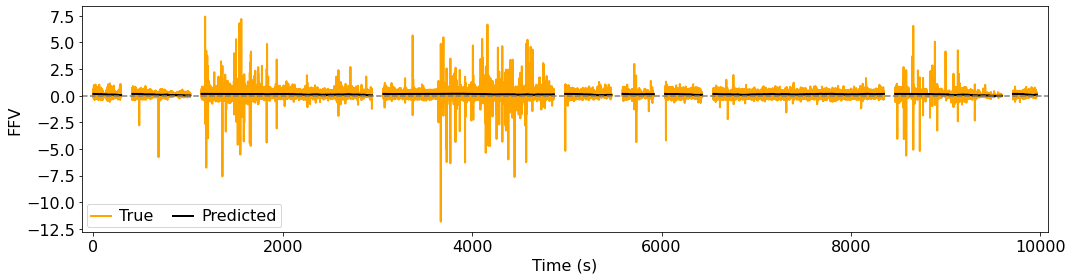

In [30]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 1
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)

# 8-neuron fast adapting, slow decay

In [31]:
# FSAVE = f'data/simple/mlv/lin_filter/rc_lin_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'
# FSAVE = f'data/simple/mlv/neur_basic/{"_".join(STRAINS).lower()}_{TARG.lower()}_from_time.npy'

# LOAD_DIR = 'neur_basic'
# LOAD_DIR = 'dyn_alt'
LOAD_DIR = 'dyn_thry'

# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'lnr'  # linear-nonlinear model
# NRL_MDL = 'dyn'  # dynamical neural model
# NRL_MDL = 'dyn_nonadapt'
# NRL_MDL = 'dyn_fast_adapt_slow_decay_pulse_only'
NRL_MDL = 'dyn_fast_adapt_slow_decay'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG.lower()}_ridge_alpha_{ALPHA}.npy'

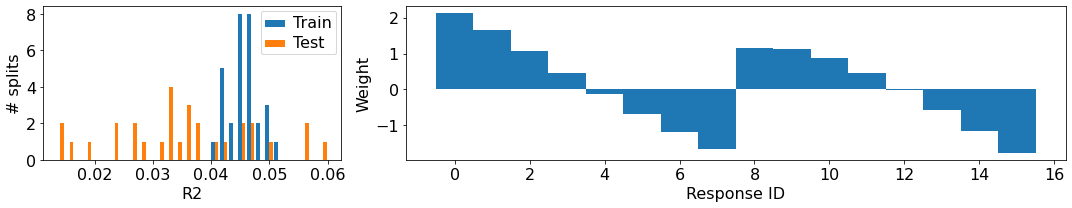

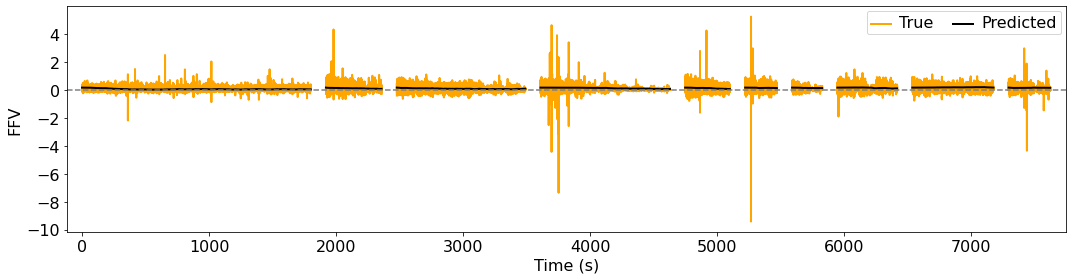

In [32]:
data = np.load(FSAVE, allow_pickle=True)[0]

gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3), tight_layout=True)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

axs[0].hist(np.transpose([data['r2_train'][TARG_SHOW], data['r2_test'][TARG_SHOW]]), bins=30)
axs[0].legend(['Train', 'Test'])
set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

axs[1].bar(np.arange(data['w'][TARG_SHOW].shape[1]), np.mean(data['w'][TARG_SHOW], axis=0), width=1)
set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

ISPLIT = 0
TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)
t_offset = 0
t_spacing = 120

for itr in TEST_ITRS:
    y = data['ys_test'][TARG_SHOW][ISPLIT][itr]
    y_hat = data['y_hats_test'][TARG_SHOW][ISPLIT][itr]
    t = np.arange(len(y))/FPS
    
    ax.plot(t + t_offset, y, c='orange', lw=2)
    ax.plot(t + t_offset, y_hat, c='k', lw=2)
    
    t_offset += t[-1] + t_spacing

ax.axhline(0, ls='--', color='gray')
ax.legend(['True', 'Predicted'], ncol=2)
set_plot(ax, x_lim=(-t_spacing, t_offset), x_label='Time (s)', y_label=TARG_SHOW, font_size=16)